<a href="https://colab.research.google.com/github/Joshmi-K-Joy/Thaniya_Internship/blob/main/clustering_music_genres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Spotify-2000.csv")

In [ ]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [ ]:
df.info

<bound method DataFrame.info of       Index                   Title                    Artist  \
0         1                 Sunrise               Norah Jones   
1         2             Black Night               Deep Purple   
2         3          Clint Eastwood                  Gorillaz   
3         4           The Pretender              Foo Fighters   
4         5  Waitin' On A Sunny Day         Bruce Springsteen   
...     ...                     ...                       ...   
1989   1990        Heartbreak Hotel             Elvis Presley   
1990   1991               Hound Dog             Elvis Presley   
1991   1992         Johnny B. Goode               Chuck Berry   
1992   1993               Take Five  The Dave Brubeck Quartet   
1993   1994          Blueberry Hill               Fats Domino   

                Top Genre  Year  Beats Per Minute (BPM)  Energy  Danceability  \
0         adult standards  2004                     157      30            53   
1              album rock

In [ ]:
print(df.corr())

                           Index      Year  Beats Per Minute (BPM)    Energy  \
Index                   1.000000 -0.607910               -0.048918 -0.114307   
Year                   -0.607910  1.000000                0.012570  0.147235   
Beats Per Minute (BPM) -0.048918  0.012570                1.000000  0.156644   
Energy                 -0.114307  0.147235                0.156644  1.000000   
Danceability           -0.047156  0.077493               -0.140602  0.139616   
Loudness (dB)          -0.260179  0.343764                0.092927  0.735711   
Liveness               -0.027125  0.019017                0.016256  0.174118   
Valence                 0.063304 -0.166163                0.059653  0.405175   
Acousticness            0.057346 -0.132946               -0.122472 -0.665156   
Speechiness            -0.050991  0.054097                0.085598  0.205865   
Popularity              0.087442 -0.158962               -0.003181  0.103393   

                        Danceability  L

<ipython-input-5-23236a4e6045>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


In [ ]:
df2 = df[["Beats Per Minute (BPM)", "Loudness (dB)",
              "Liveness", "Valence", "Acousticness",
              "Speechiness"]]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
for i in df.columns:
    MinMaxScaler(i)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(df2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df["Music Segments"] = clusters
MinMaxScaler(df["Music Segments"])
df["Music Segments"] = df["Music Segments"].map({1: "Cluster 1", 2:
    "Cluster 2", 3: "Cluster 3", 4: "Cluster 4", 5: "Cluster 5",
    6: "Cluster 6", 7: "Cluster 7", 8: "Cluster 8",
    9: "Cluster 9", 10: "Cluster 10"})

In [ ]:
print(df.head())

   Index                   Title             Artist            Top Genre  \
0      1                 Sunrise        Norah Jones      adult standards   
1      2             Black Night        Deep Purple           album rock   
2      3          Clint Eastwood           Gorillaz  alternative hip hop   
3      4           The Pretender       Foo Fighters    alternative metal   
4      5  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0  2004                     157      30            53            -14   
1  2000                     135      79            50            -11   
2  2001                     168      69            66             -9   
3  2007                     173      96            43             -4   
4  2002                     106      82            58             -5   

   Liveness  Valence Length (Duration)  Acousticness  Speechiness  Popularity  \
0        11       68         

<ipython-input-13-8df7bcac526d>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

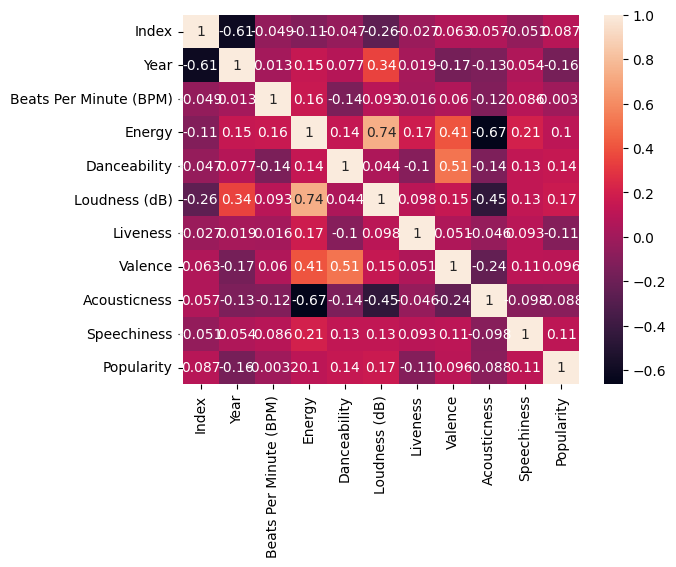

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
import plotly.graph_objects as go
PLOT = go.Figure()
for i in list(df["Music Segments"].unique()):


    PLOT.add_trace(go.Scatter3d(x = df[df["Music Segments"]== i]['Beats Per Minute (BPM)'],
                                y = df[df["Music Segments"] == i]['Energy'],
                                z = df[df["Music Segments"] == i]['Danceability'],
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='Beats Per Minute (BPM): %{x} <br>Energy: %{y} <br>Danceability: %{z}')


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Beats Per Minute (BPM)', titlefont_color = 'black'),
                                yaxis=dict(title = 'Energy', titlefont_color = 'blue'),
                                zaxis=dict(title = 'Danceability', titlefont_color = 'purple')),
                   font = dict(family = "Gilroy", color  = 'red', size = 10))